In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['BlackFriday.csv']


In [2]:
df = pd.read_csv("../input/BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

In [5]:
df['Product_ID'].nunique()

3623

In [6]:
df[df['Product_ID']=='P00085442'].nunique()

User_ID                       334
Product_ID                      1
Gender                          2
Age                             7
Occupation                     19
City_Category                   3
Stay_In_Current_City_Years      5
Marital_Status                  2
Product_Category_1              1
Product_Category_2              1
Product_Category_3              0
Purchase                      173
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [8]:
df['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [9]:
df.fillna(value=0,inplace=True)
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)

print(df['Product_Category_2'].unique())
print(df['Product_Category_3'].unique())

[ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
[ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


Dropping columns User_ID, Product_ID as they are not usefull

In [10]:
df.drop(columns = ["User_ID","Product_ID"], inplace = True)

In [11]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


In [12]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

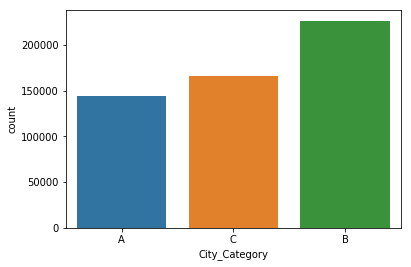

In [15]:
sns.countplot(df['City_Category'])

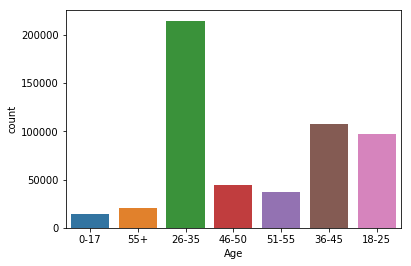

In [16]:
sns.countplot(df['Age'])

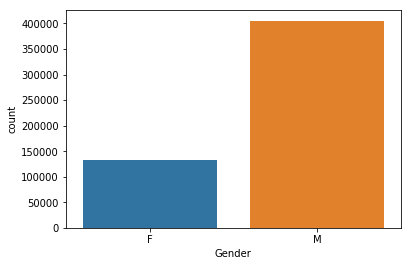

In [17]:
sns.countplot(df['Gender'])

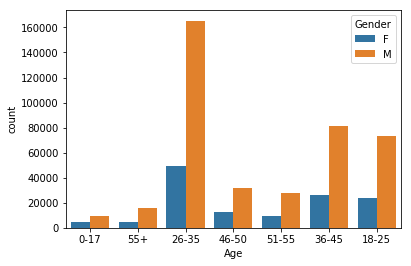

In [18]:
sns.countplot(df['Age'],hue = df['Gender'])

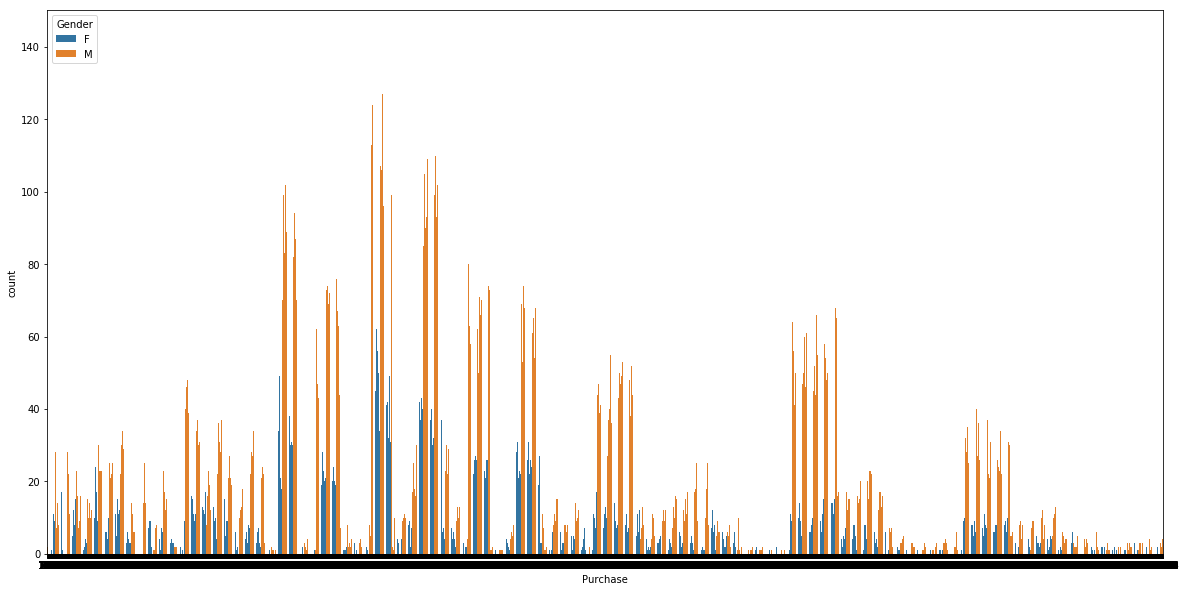

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(df['Purchase'],hue = df['Gender'])

In [22]:
df['Combined_G_M'] = df.apply(lambda x : '%s_%s' % (x['Gender'],x['Marital_Status']),axis = 1)
print(df['Combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


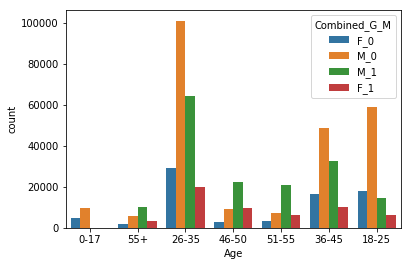

In [24]:
sns.countplot(df['Age'],hue=df['Combined_G_M'])

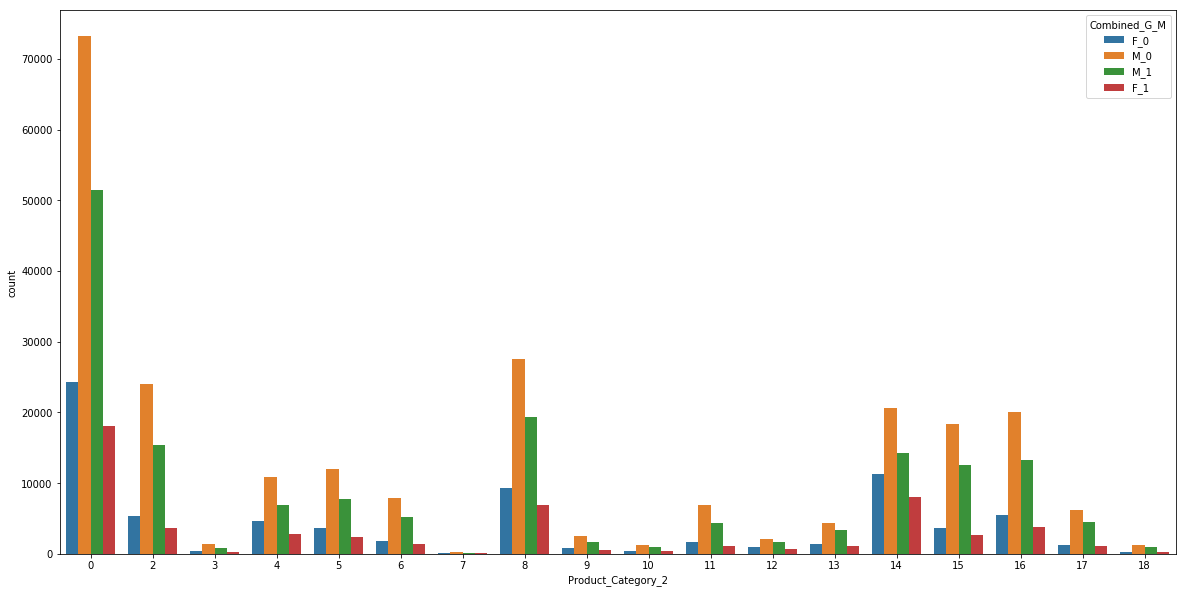

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(df['Product_Category_2'],hue=df['Combined_G_M'])

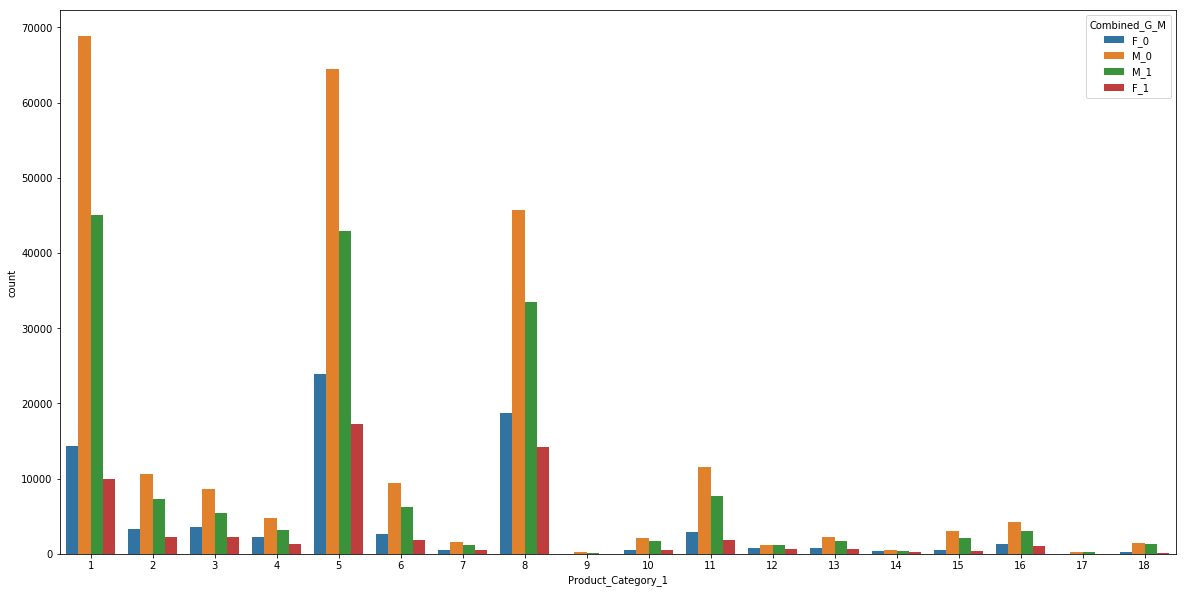

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(df['Product_Category_1'],hue=df['Combined_G_M'])

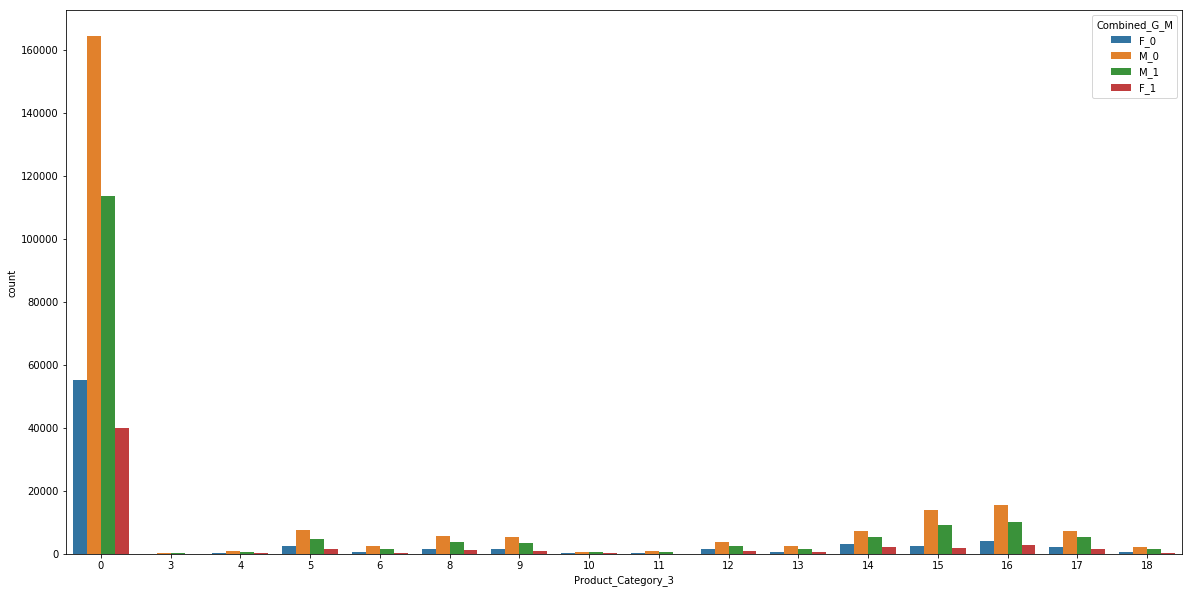

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(df['Product_Category_3'],hue=df['Combined_G_M'])

In [31]:
df_by_occupation_and_categories = df.groupby(['Occupation','Product_Category_1']).count().reset_index('Product_Category_1')

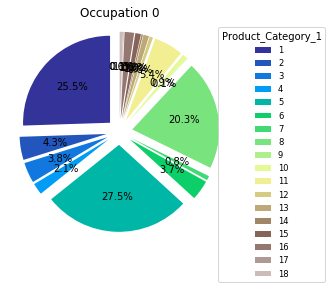

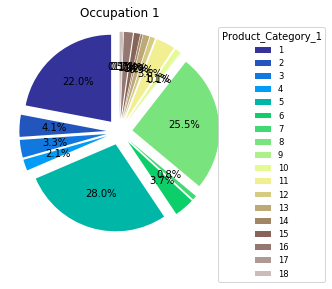

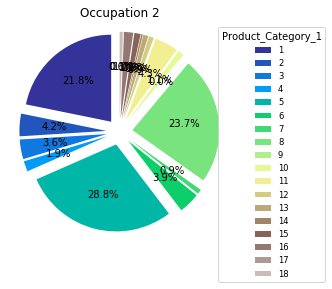

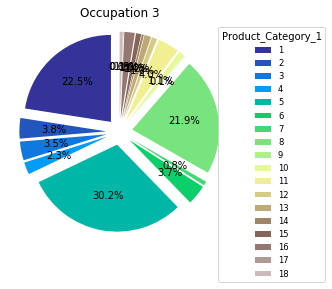

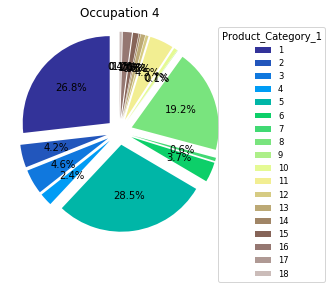

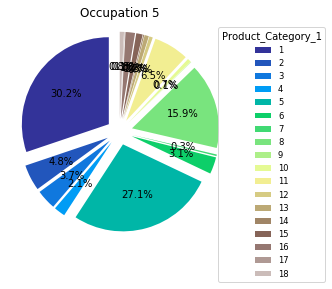

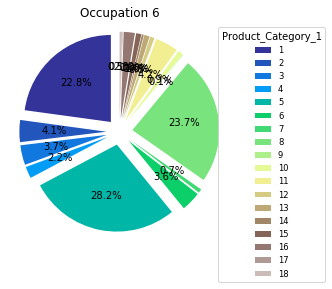

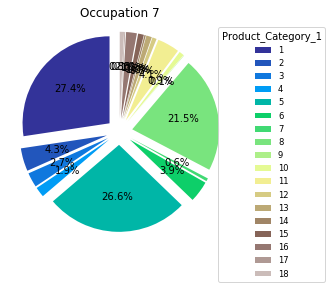

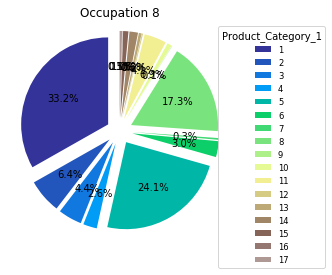

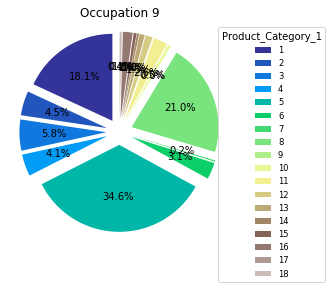

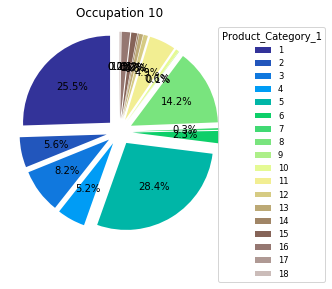

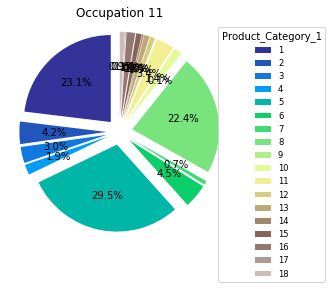

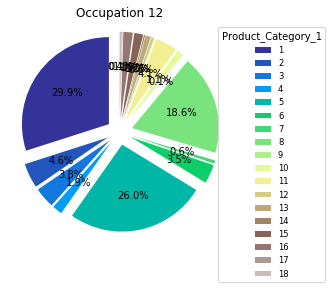

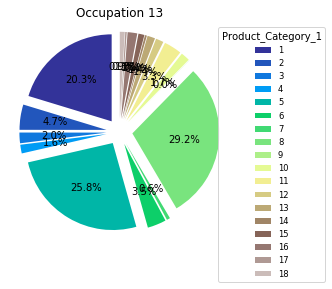

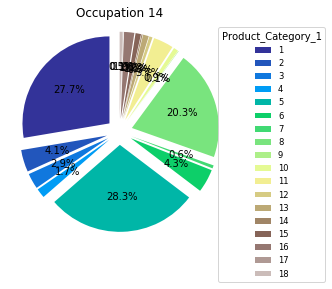

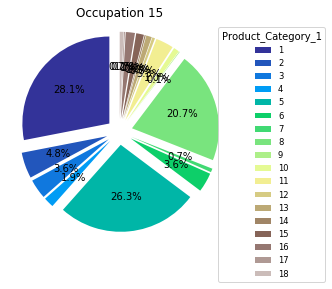

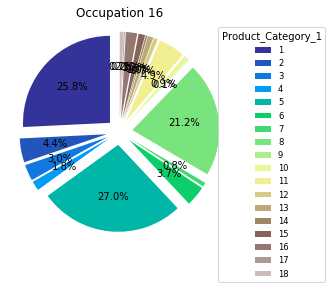

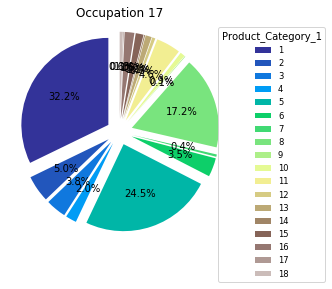

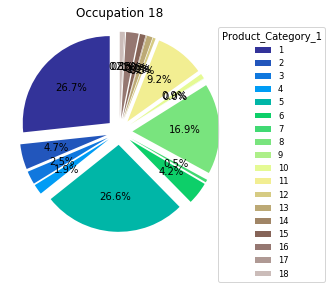

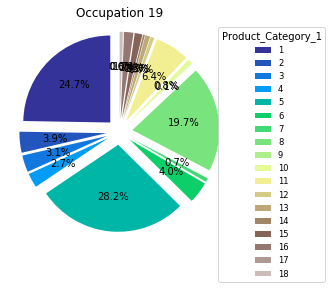

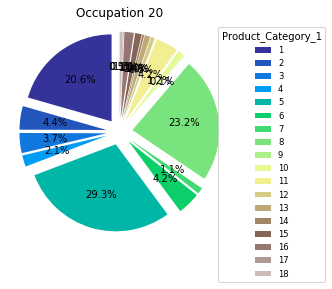

In [32]:
fig = plt.figure()
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
cmap = plt.get_cmap('terrain')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
plotFor = "Occupation {0}"
title = 'Product_Category_1'
for i in range(21):
    explode = [0.15 for i in range(len(df_by_occupation_and_categories['Gender'][i].get_values()))]
    a = plt.pie(df_by_occupation_and_categories['Gender'][i].get_values(), radius=1, colors=colors,startangle=90,autopct='%1.1f%%',explode=explode)
    plt.legend(df_by_occupation_and_categories['Product_Category_1'][0].get_values(),loc='upper center',prop=fontP, bbox_to_anchor=(1.2, 1),title=title)
    plt.title(plotFor.format(i))
    plt.show()